In [1]:
# Importamos librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Cargamos los datos
data = pd.read_csv('https://raw.githubusercontent.com/JimenaAreta/thevalley-MDS/jimena/datasets/ex2data1.txt', header=None, names=['exam_1', 'exam_2','Admitted'])
data.head()

,exam_1,exam_2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
# Responder a las siguientes preguntas
# ¿Cuál es mi variable objetivo? ¿Y mis variables predictoras? objetivo: si me admiten, predictores: exam 1 y exam 2
# ¿Cuántas observaciones tenemos? ¿Es poco o mucho volumen? poco volumen
# ¿Qué tipo de aprendizaje es? supervisado
# ¿Estamos ante un problema de regresión o de clasificación? clasificacion binaria
# ¿Qué finalidad pretendemos alcanzar? si me admiten o no me admiten

## EDA (Ánalisis exploratorio de datos)

In [4]:
# Análisis estadístico de las variables
data.describe()

,exam_1,exam_2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [5]:
data.shape

(100, 3)

<Axes: xlabel='exam_1', ylabel='exam_2'>

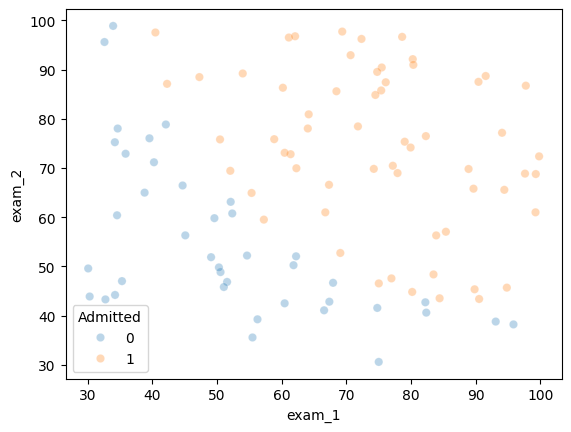

In [6]:
sns.scatterplot(x='exam_1', y='exam_2', hue='Admitted', alpha =0.3, data=data)

In [ ]:
# Distribución del output ¿Están los datos balanceados o desbalanceados?
data['Admitted'].value_counts()

#significaria que en una clase tenemos muchos menos datos que en la otra, en ese caso no esta desbalanceado

,count
Admitted,
1,60
0,40


In [7]:
data['Admitted'].mean()

np.float64(0.6)

In [8]:
# Definimos la función sigmoidal (convierte el output entre 0 y 1)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

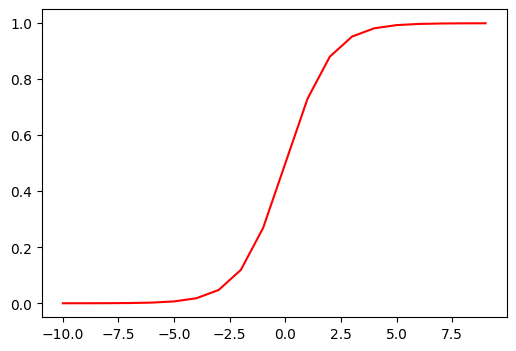

In [9]:
# Representación de la función sigmoidal
#transforma probabilidades, en vez de darme un numero super alto, me da la probabilidad entre 0 y 1
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(nums, sigmoid(nums), 'r')

In [10]:
# Regresión Logística
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
X = data[['exam_1', 'exam_2']]
y = data['Admitted']
logmodel.fit(X,y)

LogisticRegression()

In [12]:
# Persona con buenas notas. en las regresiones lineales se usaba predict, y en las de clasificacion se usa predict_proba
X_new = pd.DataFrame({'exam_1': [80],
                      'exam_2': [80]})
preds = logmodel.predict_proba(X_new)
preds[:,1]
#preds [:,1] para que solo nos de la probabilidad que queremos, en este caso de que SI sea admitido. como python empieza por 0, por eso ponemos 1 queremos quedarnos con la segunda

array([0.99940295])

In [13]:
preds
#te da 2, porque uno es la probabilidad de que NO sea aceptado y la de que SI sea aceptado)

array([[5.97054964e-04, 9.99402945e-01]])

In [14]:
print(logmodel.intercept_)
print(logmodel.coef_)

[-25.05219314]
[[0.20535491 0.2005838 ]]


In [15]:
# Score de admisión de un alumno que ha sacado 60 en el primer examen y 60 en el segundo
# Persona con buenas notas
X_new = pd.DataFrame({'exam_1': [60],
                      'exam_2': [60]})
preds_2 = logmodel.predict_proba(X_new)
print(preds_2[:,1])


[0.3327285]


In [16]:
# Nueva columna (train / test)
data['type'] = 'train'

obs_1 = pd.DataFrame({'exam_1': [80], 'exam_2': [80], 'Admitted': preds[:,1], 'type': "test"})
obs_2 = pd.DataFrame({'exam_1': [60], 'exam_2': [60], 'Admitted': preds_2[:,1], 'type': "test"})

print(obs_1)
print(obs_2)

   exam_1  exam_2  Admitted  type
0      80      80  0.999403  test
   exam_1  exam_2  Admitted  type
0      60      60  0.332728  test


In [17]:
data_total = pd.concat([data,obs_1, obs_2])

In [18]:
data_total

,exam_1,exam_2,Admitted,type
0,34.623660,78.024693,0.000000,train
1,30.286711,43.894998,0.000000,train
2,35.847409,72.902198,0.000000,train
3,60.182599,86.308552,1.000000,train
4,79.032736,75.344376,1.000000,train
...,...,...,...,...
97,99.315009,68.775409,1.000000,train
98,55.340018,64.931938,1.000000,train
99,74.775893,89.529813,1.000000,train
0,80.000000,80.000000,0.999403,test


<Axes: xlabel='exam_1', ylabel='exam_2'>

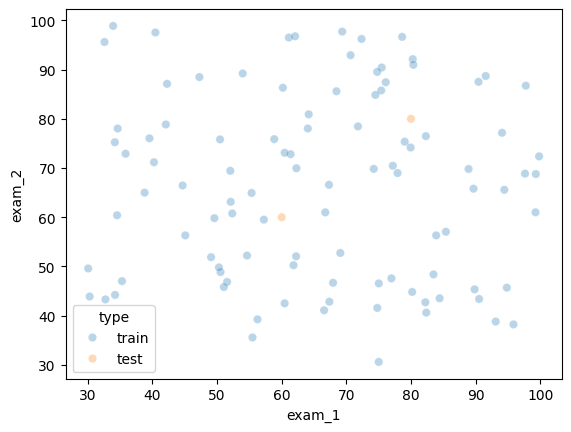

In [19]:
# First, plot the observed data
sns.scatterplot(x='exam_1', y='exam_2', hue='type', alpha =0.3, data=data_total)

In [20]:
print(logmodel.intercept_)
print(logmodel.coef_)

[-25.05219314]
[[0.20535491 0.2005838 ]]


In [21]:
b_0 = logmodel.intercept_
b_1 = logmodel.coef_[0][0]
b_2 = logmodel.coef_[0][1]
print(b_0, b_1, b_2)

[-25.05219314] 0.20535491218577986 0.20058380395530154


In [22]:
# Estudiante 1
print(1/(1+np.exp(-(b_0 + b_1 *80 + b_2*80))))
# Estudiante 2
print(1/(1+np.exp(-(b_0 + b_1 *60 + b_2*60))))

[0.99940295]
[0.3327285]


# Churn & Telco

## Carga de datos

Importaremos el dataset de sobre el que trabajaremos

In [23]:
# Cargamos
df = pd.read_csv('https://raw.githubusercontent.com/JimenaAreta/thevalley-MDS/jimena/datasets/telecom_churn.csv')
df.head() # Cogemos las primeras 5 filas

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Hemos creado el primer objeto **df**, que es una matriz con datos. Esta matriz contiene los datos y contiene:

1. **Clase**: plantilla genérica (molde o reglas) de cómo es ese objeto.
2. **Atributos**: son los diferentes características que puede tener un objeto. Para nuestro caso será, el **tamaño**, el nombre de las columnas. *Van sin paréntesis*
3. **Métodos**: Son las acciones que podremos utilizar sobre nuestros objetos. Calcular medias, sumas, conteos, etc. *Van con paréntesis*





In [24]:
# Ejemplo
df.shape

(3333, 20)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

## Manipulación del dataset
Tenemos creado el objeto df en memoria y podemos crear diferentes

In [26]:
df.describe() # Descriptivo de todas las variables numéricas

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [29]:
# Devuelve 1 columna
df["Account length"]

,Account length
0,128
1,107
2,137
3,84
4,75
...,...
3328,192
3329,68
3330,28
3331,184


In [27]:
# Devuelve las primeras dos observaciones
df.head(2)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


In [30]:
print(df.shape)
print(df.columns)

(3333, 20)
Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')



**Creación de columnas**, para empezar a modelar

In [31]:
df['Churn_num'] = df['Churn'].astype('int64')

In [32]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Churn_num
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,0


**Eliminar** una variable

In [33]:
df = df.drop(columns="Churn")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn_num
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


**Cambiar nombre** a una variable

In [34]:
df.rename(columns={"Churn_num": "Churn"}, inplace=True)
df.head(1)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0


**Cálculo** sobre una columna

In [39]:
# Calculamos la distribución del target (en valor absoluto y %)
df['Churn'].value_counts()


,count
Churn,
0,2850
1,483


In [41]:
df['Churn'].value_counts(normalize=True)*100

,proportion
Churn,
0,85.508551
1,14.491449


**Filtar** por condición

In [43]:
# Filtrar aquellos que tengan estado 'CO'
df_co = df[df['State'] == 'CO']
display(df_co.head())
print(df_co.shape)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,1
56,CO,141,415,No,No,0,126.9,98,21.57,180.0,62,15.30,140.8,128,6.34,8.0,2,2.16,1,0
57,CO,121,408,No,Yes,30,198.4,129,33.73,75.3,77,6.40,181.2,77,8.15,5.8,3,1.57,3,1
82,CO,55,408,No,Yes,25,165.6,123,28.15,136.1,95,11.57,175.7,90,7.91,11.0,2,2.97,3,0
108,CO,141,415,No,Yes,32,148.6,91,25.26,131.1,97,11.14,219.4,142,9.87,10.1,1,2.73,1,0


(66, 20)


In [45]:
# Filtrar aquellos que se hayan marchado de la compañía. ¿Cuántos hay?
df_churn = df[df['Churn'] == 1]
display(df_churn.head())
print(df_churn.shape)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,1
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,1
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,1


(483, 20)


**Filtro más operación**

In [46]:
# Para los clientes que se han marchado sacar la media del total de minutos por día
df_churn['Total day minutes'].mean()

np.float64(206.91407867494823)

**Agrupación**: agrupar por diferentes condiciones.

In [47]:
# Agrupando por el churn quiero sacar la media de 'Total day charge', 'Total eve charge' y 'Total night charge'
df_churn.groupby('Churn')[['Total day charge', 'Total eve charge', 'Total night charge']].mean()

,Total day charge,Total eve charge,Total night charge
Churn,,,
1,35.175921,18.054969,9.235528


**Visualización**

Aquí utilizaremos diferentes plots de la libreria `seaborn` que está importada como `sns`.
Como siempre hay un [cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf), principales gráficos:


* Scatterplot
* Bar Chart
* Count Plot
* Point Plot
* Boxplot
* Violinplot



<Axes: xlabel='International plan', ylabel='Churn'>

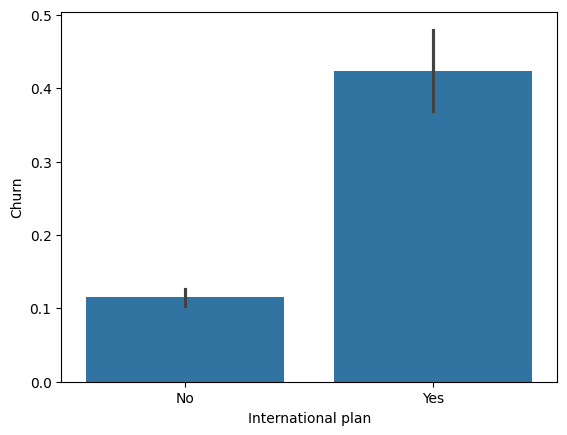

In [49]:
# Gráfico de barras que represente el número de clientes por la variable 'International Plan' y separado por la variable 'Churn'
sns.barplot(x="International plan", y="Churn", data=df)

<Axes: xlabel='Total day charge', ylabel='Total eve charge'>

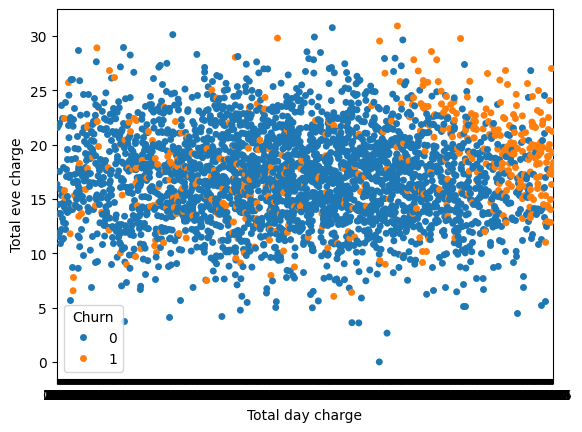

In [52]:
# Scatterplot que represente 'Total day charge' frente a 'Total eve charge' separando por 'Churn'
sns.stripplot(x="Total day charge", y="Total eve charge", hue="Churn", data=df)

## Ejercicio: Manipulación / Visualización (Para casa)

[Pandas CheatSheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

[Seaborn CheatSheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)

**Manipulación de datos**

0. Utiliza el atributo `columns`
1.   Utiliza la función `isnull()` a la columna `State`. Aplica la función `sum()` a posteriori
2.   **Crea una columna** que sea la multiplicación de `Total day charge` y `Total eve charge`, llámala `prod_day_eve`
3. De la columna **State**, utiliza la función `value_counts` para ver los atributos con su número con opción `normalize=True` y sin
4. Calcula la media de todas las variables por aquellos usuarios que `Churn=0` (filtro + operación)

**Visualización**

1.   Utiliza un `countplot` para ver si hay diferencias en el churn de los que tienen `Voice Plan`
2.   Utiliza un `barplot` donde x es el estado, y es `total day charge`, filtra en df por el estado `KS`

**Avanzados**

1. Utiliza un `apply` en el dataframe con la función `max` de la libreria numpy
2. Utiliza el método `corr()` para crear una matriz de correlaciones llamada `df_corr`. Utiliza la libreria seaborn para poder graficarla `heatmap`. Si te sobre tiempo piensa en cómo hacer visualmente atractiva



In [65]:
# Manipulación de datos
## Utiliza el atributo columns
df.columns
## Utiliza la función isnull() a la columna State. Aplica la función sum() a posteriori
## Crea una columna que sea la multiplicación de Total day charge y Total eve charge, llámala prod_day_eve
## De la columna State, utiliza la función value_counts para ver los atributos con su número con opción normalize=True y sin
## Calcula la media de todas las variables por aquellos usuarios que Churn=0 (filtro + operación)


Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn', 'Prod_day_eve'],
      dtype='object')

In [62]:
## Utiliza la función isnull() a la columna State. Aplica la función sum() a posteriori
df["State"].isnull().sum()

np.int64(0)

In [63]:
## Crea una columna que sea la multiplicación de Total day charge y Total eve charge, llámala prod_day_eve
df['Prod_day_eve'] = df['Total day charge']*df['Total eve charge' ]
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Prod_day_eve
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,756.2746
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,456.5514
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,426.2140
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,267.7340
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,357.3674


In [64]:
## De la columna State, utiliza la función value_counts para ver los atributos con su número con opción normalize=True y sin
df['State'].value_counts(normalize=True)
df['State'].value_counts()

,count
State,
WV,106
MN,84
NY,83
AL,80
OH,78
WI,78
OR,78
WY,77
VA,77


In [73]:
## Calcula la media de todas las variables por aquellos usuarios que Churn=0 (filtro + operación)
df_churn = df[df['Churn'] == 0]
df_churn.mean(numeric_only=True)

,0
Account length,100.793684
Area code,437.074737
Number vmail messages,8.604561
Total day minutes,175.175754
Total day calls,100.283158
Total day charge,29.780421
Total eve minutes,199.043298
Total eve calls,100.038596
Total eve charge,16.918909
Total night minutes,200.133193


<Axes: xlabel='Voice mail plan', ylabel='count'>

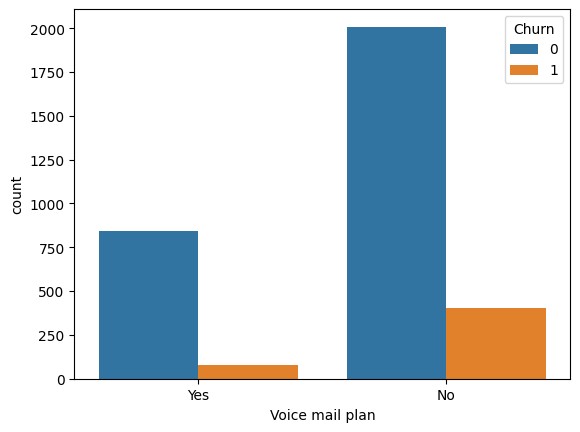

In [78]:
# Visualización
## Utiliza un countplot para ver si hay diferencias en el churn de los que tienen Voice Plan
sns.countplot(df, x='Voice mail plan', hue='Churn')


<Axes: xlabel='State', ylabel='Total day charge'>

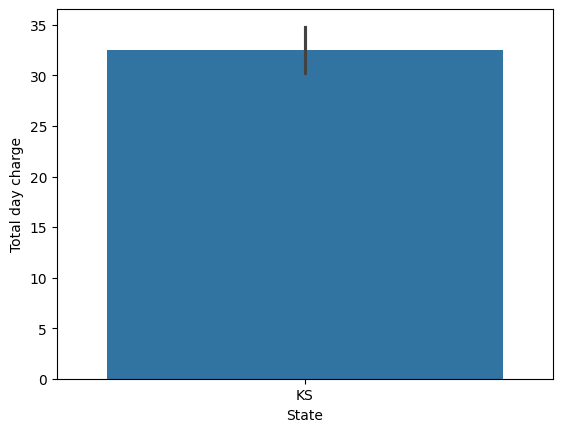

In [79]:
## Utiliza un barplot donde x es el estado, y es total day charge, filtra en df por el estado KS
sns.barplot(x='State', y='Total day charge', data=df[df['State'] == 'KS'])

In [80]:
# Avanzados
## Utiliza un apply en el dataframe con la función max de la libreria numpy
df.apply(np.max)


,0
State,WY
Account length,243
Area code,510
International plan,Yes
Voice mail plan,Yes
Number vmail messages,51
Total day minutes,350.8
Total day calls,165
Total day charge,59.64
Total eve minutes,363.7


<Axes: >

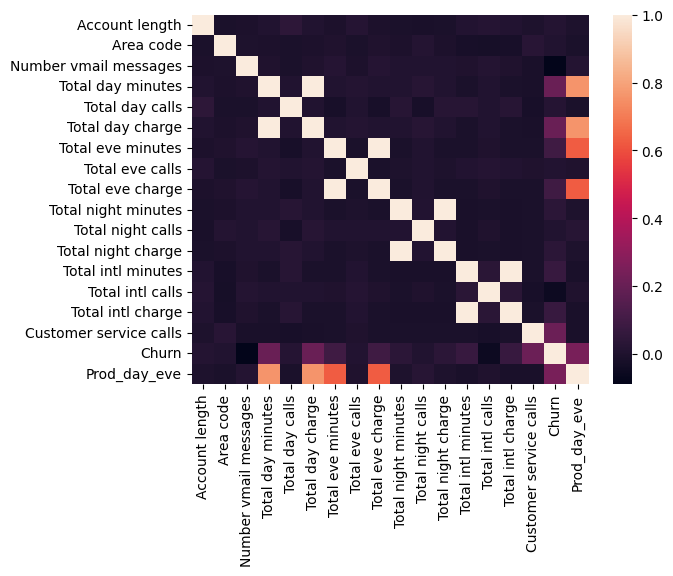

In [82]:
## Utiliza el método corr() para crear una matriz de correlaciones llamada df_corr. Utiliza la libreria seaborn para poder graficarla heatmap. Si te sobre tiempo piensa en cómo hacer visualmente atractiva
df_corr = df.corr(numeric_only = True)
sns.heatmap(df_corr)

## First ML Model: Logistic Regression

In [ ]:
# Cargamos
df = pd.read_csv('https://raw.githubusercontent.com/JimenaAreta/thevalley-MDS/jimena/datasets/telecom_churn.csv')
df.head() # Cogemos las primeras 5 filas

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# Pasamos Churn a numerica
df['Churn'] = df['Churn'].astype('int64')

In [ ]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


¿Que pasa con las Variables categóricas? [Get dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [ ]:
vmp = pd.get_dummies(df['Voice mail plan'],prefix="voice", dtype = int)   #
ip = pd.get_dummies(df['International plan'],prefix="ip", dtype = int)

In [ ]:
ip

,ip_No,ip_Yes
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
3328,1,0
3329,1,0
3330,1,0
3331,0,1


In [ ]:
vmp

,voice_No,voice_Yes
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
3328,0,1
3329,1,0
3330,1,0
3331,1,0


In [ ]:
pd.get_dummies(df['State'],drop_first=False, dtype=int).head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Quitamos columna State
df.drop('State',axis=1,inplace=True)

In [ ]:
df.drop(['Voice mail plan','International plan'],axis=1,inplace=True)
df = pd.concat([df,vmp,ip],axis=1)
df.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,voice_No,voice_Yes,ip_No,ip_Yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,11.01,10.0,3,2.70,1,0,0,1,1,0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,11.45,13.7,3,3.70,1,0,0,1,1,0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,7.32,12.2,5,3.29,0,0,1,0,1,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,8.86,6.6,7,1.78,2,0,1,0,0,1
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,8.41,10.1,3,2.73,3,0,1,0,0,1


In [ ]:
df.columns

Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls', 'Churn', 'voice_No', 'voice_Yes', 'ip_No',
       'ip_Yes'],
      dtype='object')

In [ ]:
df[['voice_No','voice_Yes','ip_No','ip_Yes']] = df[['voice_No','voice_Yes','ip_No','ip_Yes']].astype(int)

In [ ]:
df

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,voice_No,voice_Yes,ip_No,ip_Yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,11.01,10.0,3,2.70,1,0,0,1,1,0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,11.45,13.7,3,3.70,1,0,0,1,1,0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,7.32,12.2,5,3.29,0,0,1,0,1,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,8.86,6.6,7,1.78,2,0,1,0,0,1
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,8.41,10.1,3,2.73,3,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,...,12.56,9.9,6,2.67,2,0,0,1,1,0
3329,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,...,8.61,9.6,4,2.59,3,0,1,0,1,0
3330,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,...,8.64,14.1,6,3.81,2,0,1,0,1,0
3331,184,510,0,213.8,105,36.35,159.6,84,13.57,139.2,...,6.26,5.0,10,1.35,2,0,1,0,0,1


In [ ]:
# ¿Me interesa quedarme con las dos columnas que he creado pasando a booleanas?

### Matriz de entrenamiento
Aquí ya tendríamos lista nuestra matriz de entrenamiento, para ello cargaremos las diferentes librerías necesarias para entrenar un primer algoritmo.

### Separamos train y test
A diferencia del ejercicio anterior, si queremos evaluar nuestro modelo correctamente tenemos que hacere una separación train/test (los datos donde evaluamos no pueden ser los mismos que donde entrenamos)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Churn',axis=1),
                                                    df['Churn'], test_size=0.25,
                                                    random_state=101) # añadimos una semilla para reproducibilidad

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2499, 20)
(2499,)
(834, 20)
(834,)


### Entrenamos y predecimos

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Predecimos en test

Evaluamos las predicciones

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
dif = abs(predictions - y_test)
sum_dif = sum(dif)
error_rate = sum_dif / len(dif)
accuracy = 1 - error_rate
accuracy

0.8729016786570744

Utilizaremos `predict_proba` devuelve, para cada muestra, un vector de scores normalizados (cuyos valores están entre 0 y 1) por clase que se interpretan como probabilidades si el modelo está bien calibrado (lo veremos en la clase de métricas de evaluación)

In [ ]:
logmodel.predict_proba(X_test)[:,1][1:20]

array([0.0472695 , 0.19225461, 0.22981535, 0.30030143, 0.03358977,
       0.25514177, 0.09021851, 0.03045951, 0.07772034, 0.14835821,
       0.07158822, 0.28788253, 0.42593563, 0.12722883, 0.09244901,
       0.41790658, 0.08740857, 0.01765337, 0.22232419])

La curva ROC se construye usando un score continuo del modelo (por ejemplo, la salida de `predict_proba` para la clase positiva en un problema binario) y probando todos los umbrales posibles: para cada umbral se decide qué casos son positivos, se calcula la tasa de verdaderos positivos (sensibilidad/recall) y la tasa de falsos positivos, y se dibuja la curva con esos puntos.

El AUC resume la capacidad de separación del modelo: cuanto más alto, mejor ordena a los positivos por encima de los negativos (1 sería perfecto y 0,5 sería como azar). Importante: la ROC/AUC mide discriminación (ranking), no calibración de probabilidades.


In [ ]:
y_train.mean()

np.float64(0.15126050420168066)

In [ ]:
y_test.mean()

np.float64(0.12589928057553956)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])
roc_auc

np.float64(0.7573192239858906)

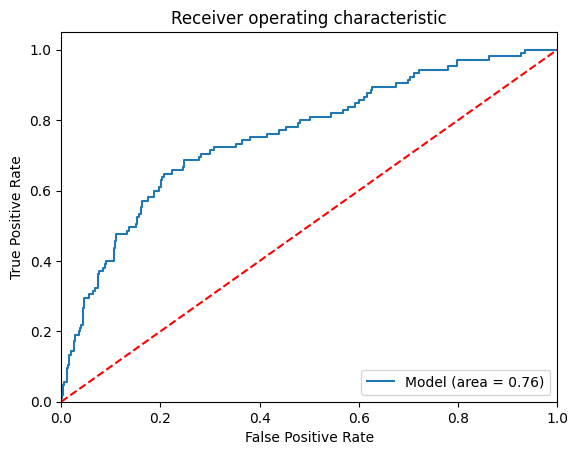

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Model (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
prob_pred = pd.DataFrame({'probs':logmodel.predict_proba(X_test)[:,1]})
df_ytest = pd.DataFrame(y_test)

In [ ]:
prob_pred.reset_index(drop=True, inplace=True)
df_ytest.reset_index(drop=True, inplace=True)
test_probs = pd.concat([prob_pred,df_ytest],axis=1)
test_probs.head()

,probs,Churn
0,0.163439,0
1,0.047269,0
2,0.192255,0
3,0.229815,0
4,0.300301,0


### Ejercicio Modelo

**Visualización**
- Seguido del distribution plot, ¿podrías hacer un `sns`boxplot donde x sea el churn y y la probabilidad?


In [ ]:
# Visualización
## Seguido del distribution plot, ¿podrías hacer un `sns`boxplot donde x sea el churn y y la probabilidad?